In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def readRecord(tfrecord_filename):
    filename_queue = tf.train.string_input_producer([tfrecord_filename])
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(serialized_example,
                features={'target_raw' : tf.FixedLenFeature([], tf.string),
                          'noisy_m1_raw' : tf.FixedLenFeature([], tf.string),
                          'noisy_m2_raw' : tf.FixedLenFeature([], tf.string),})
    clean_wave_ = tf.decode_raw(features['target_raw'], tf.float32)
    noisy_wave1 = tf.decode_raw(features['noisy_m1_raw'], tf.float32)
    noisy_wave2 = tf.decode_raw(features['noisy_m2_raw'], tf.float32)
    
    clean_wave_.set_shape(16384)#input_size
    noisy_wave1.set_shape(16384)
    noisy_wave2.set_shape(16384)
    
    clean_wave = tf.cast(clean_wave_, tf.float32)
    noisy_wave1 = tf.cast(noisy_wave1, tf.float32)
    noisy_wave2 = tf.cast(noisy_wave2, tf.float32)

    return clean_wave,noisy_wave1,noisy_wave2

In [3]:
tfrecord_filename_train='./TFR/DSEnet_DATA2_DEMAND_4_test.tfrecords'

In [4]:
T_tf_train_,micR_tf_train_,micL_tf_train_ = readRecord(tfrecord_filename_train)


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.


In [5]:
batch_size = 10
tf.set_random_seed(777)


batch_T_tf_train_,\
batch_R_tf_train_,\
batch_L_tf_train_ = tf.train.shuffle_batch([T_tf_train_,
                                             micR_tf_train_,
                                             micL_tf_train_],
                                             batch_size=batch_size,
                                             num_threads=2,
                                             capacity=1000+3*batch_size,
                                             min_after_dequeue=batch_size)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.shuffle(min_after_dequeue).batch(batch_size)`.


In [6]:
sess = tf.Session()

coord = tf.train.Coordinator()
tf.train.start_queue_runners(sess=sess,coord=coord)

init = tf.global_variables_initializer()
sess.run(init)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [10]:
for i in range(100):
    batch_T_train,\
    batch_R_train,\
    batch_L_train = sess.run([batch_T_tf_train_,
                             batch_R_tf_train_,
                             batch_L_tf_train_])

In [11]:
print(max(batch_T_train[0]))

0.8664928


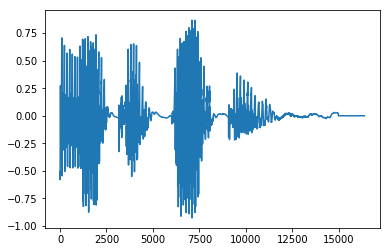

In [12]:
# plt.plot(batch_L_train[0])
# plt.plot(batch_R_train[0])
plt.plot(batch_T_train[0])
plt.show()